# TC2032 – Diseño de Agentes Inteligentes
## Actividad 4 – Búsqueda Local

### Objetivo
Implementar y comparar los métodos de búsqueda **Hill Climbing** y **Recocido Simulado** en el problema del **Viajero (Traveling Salesman Problem, TSP)**.  
Se programará la solución en un notebook de **Google Colab**, experimentando con diferentes configuraciones de los algoritmos.

---

### Descripción del problema
El **Problema del Viajero (TSP)** es un desafío de optimización **NP-duro**.  
La meta es encontrar la ruta más corta posible que visite un conjunto de ciudades exactamente una vez y regrese a la ciudad de origen.

- **Entrada:** lista de ciudades (nodos) y las distancias entre cada par de ellas.  
- **Salida:** un orden de ciudades que minimice la distancia total del viaje.  

El número de posibles rutas crece factorialmente (**n!**), lo que hace inviable una búsqueda exhaustiva incluso con pocas ciudades.  
Por eso, se aplican algoritmos de **búsqueda local** como Hill Climbing y Recocido Simulado.

---

### Matriz de distancias (10 ciudades, km)

|   | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 |
|---|---|---|---|---|---|---|---|---|---|----|
| 1 | 0   | 120 | 250 | 310 | 180 | 200 | 270 | 150 | 340 | 290 |
| 2 | 120 | 0   | 190 | 220 | 270 | 150 | 280 | 200 | 300 | 250 |
| 3 | 250 | 190 | 0   | 110 | 160 | 210 | 140 | 180 | 90  | 220 |
| 4 | 310 | 220 | 110 | 0   | 140 | 180 | 130 | 150 | 100 | 200 |
| 5 | 180 | 270 | 160 | 140 | 0   | 190 | 170 | 210 | 120 | 240 |
| 6 | 200 | 150 | 210 | 180 | 190 | 0   | 160 | 120 | 230 | 210 |
| 7 | 270 | 280 | 140 | 130 | 170 | 160 | 0   | 90  | 150 | 100 |
| 8 | 150 | 200 | 180 | 150 | 210 | 120 | 90  | 0   | 180 | 160 |
| 9 | 340 | 300 | 90  | 100 | 120 | 230 | 150 | 180 | 0   | 170 |
|10 | 290 | 250 | 220 | 200 | 240 | 210 | 100 | 160 | 170 | 0   |

---

### Actividades a realizar
1. Implementar **dos notebooks**:
   - `hill_climbing_tsp.ipynb`  
   - `simulated_annealing_tsp.ipynb`  

2. Definir en cada uno:
   - **Solución inicial** (cómo se genera la primera ruta).  
   - **Función de vecindad** (cómo se generan rutas vecinas, sin cubrir todo el espacio).  
   - **Función de costo** (distancia total de la ruta).  

3. **Experimentos:**
   - Probar al menos **dos vecindarios distintos** en ambos algoritmos.  
   - Para recocido simulado: al menos **cinco combinaciones** de temperatura inicial y razón de enfriamiento.  

4. **Documentar resultados:**
   - Tablas con métricas obtenidas.  
   - Gráficas de convergencia.  
   - Reflexión final (mínimo 400 palabras) con observaciones, dificultades y conclusiones.  

---

### Criterios de evaluación
- Implementación de códigos en Python (**2 notebooks completos**): **60%**  
- Tablas y gráficas de resultados: **20%**  
- Documentación y reflexión final: **20%**

**¿Cómo generamos la solución inicial en Hill Climbing?**

Usamos un tour aleatorio con la ciudad 0 fija al inicio (equivale a fijar la “Ciudad 1”). Esto permite comparar corridas con diferentes vecindarios usando el mismo punto de partida.

**¿Cuál es nuestra función de vecindad en Hill Climbing?**

Probamos dos vecindarios distintos (como pide el inciso c):

SWAP: intercambia dos ciudades del tour (sin mover la ciudad inicial).

INSERT: extrae una ciudad y la inserta en otra posición (sin mover la ciudad inicial).

In [ ]:
# ===========================
# Hill Climbing (TSP) – EXACTO A LA CONSIGNA
# - Solución inicial: tour aleatorio con ciudad 0 fija (i)
# - Vecindarios: SWAP e INSERT (ii) + (c) “al menos un par de vecindarios”
# ===========================

import random

# --------- Matriz de distancias (10 ciudades) ---------
D = [
[0,120,250,310,180,200,270,150,340,290],
[120,0,190,220,270,150,280,200,300,250],
[250,190,0,110,160,210,140,180,90,220],
[310,220,110,0,140,180,130,150,100,200],
[180,270,160,140,0,190,170,210,120,240],
[200,150,210,180,190,0,160,120,230,210],
[270,280,140,130,170,160,0,90,150,100],
[150,200,180,150,210,120,90,0,180,160],
[340,300,90,100,120,230,150,180,0,170],
[290,250,220,200,240,210,100,160,170,0],
]
N = len(D)

# --------- (i) Solución inicial ---------
def initial_random_tour(start=0):
    """Tour aleatorio con ciudad 'start' fija al inicio."""
    cities = list(range(N))
    cities.remove(start)
    random.shuffle(cities)
    return [start] + cities

# --------- Costo de un tour ---------
def tour_length(tour):
    c = 0
    for i in range(len(tour)-1):
        c += D[tour[i]][tour[i+1]]
    c += D[tour[-1]][tour[0]]  # regreso al origen
    return c

# --------- (ii) Vecindarios distintos ---------
def neighbors_swap(tour):
    """SWAP: intercambia dos ciudades (sin mover la posición 0)."""
    n = len(tour)
    for i in range(1, n-1):
        for j in range(i+1, n):
            nb = tour[:]
            nb[i], nb[j] = nb[j], nb[i]
            yield nb

def neighbors_insert(tour):
    """INSERT: saca la ciudad en i y la inserta en j (sin mover la posición 0)."""
    n = len(tour)
    for i in range(1, n):
        for j in range(1, n):
            if i == j:
                continue
            nb = tour[:]
            city = nb.pop(i)
            nb.insert(j, city)
            yield nb

# --------- Mejor vecino (best-improvement) ---------
def best_improving_neighbor(tour, neighborhood):
    current_cost = tour_length(tour)
    best = None
    best_cost = current_cost
    for nb in neighborhood(tour):
        c = tour_length(nb)
        if c < best_cost:
            best, best_cost = nb, c
    return best, best_cost

# --------- Hill Climbing ---------
def hill_climbing(initial_tour, neighborhood, verbose=True):
    current = initial_tour[:]
    cost = tour_length(current)
    if verbose:
        print("-------- Estado inicial --------")
        print("Tour:", current)
        print("Costo:", cost)
    step = 0
    while True:
        step += 1
        nb, new_cost = best_improving_neighbor(current, neighborhood)
        if nb is None or new_cost >= cost:
            break
        current, cost = nb, new_cost
        if verbose:
            print(f"Iteración {step:02d} -> Costo: {cost}")
    if verbose:
        print("-------- Solución --------")
        print("Tour:", current)
        print("Costo final:", cost)
    return current, cost

# ===========================
# (c) EXPERIMENTO: al menos un par de vecindarios distintos
# Mismo tour inicial para comparar SWAP vs INSERT
# ===========================
random.seed()  # si quieres reproducible, fija una semilla: random.seed(42)
init = initial_random_tour(start=0)

print("=== Hill Climbing con SWAP ===")
sol_swap, cost_swap = hill_climbing(init, neighbors_swap, verbose=True)

print("\n=== Hill Climbing con INSERT ===")
# importante: usar la MISMA inicialización para comparación justa
sol_insert, cost_insert = hill_climbing(init, neighbors_insert, verbose=True)


=== Hill Climbing con SWAP ===
-------- Estado inicial --------
Tour: [0, 5, 2, 7, 4, 8, 3, 9, 6, 1]
Costo: 1720
Iteración 01 -> Costo: 1580
Iteración 02 -> Costo: 1470
Iteración 03 -> Costo: 1400
Iteración 04 -> Costo: 1350
Iteración 05 -> Costo: 1320
Iteración 06 -> Costo: 1310
-------- Solución --------
Tour: [0, 1, 5, 4, 3, 2, 8, 9, 6, 7]
Costo final: 1310

=== Hill Climbing con INSERT ===
-------- Estado inicial --------
Tour: [0, 5, 2, 7, 4, 8, 3, 9, 6, 1]
Costo: 1720
Iteración 01 -> Costo: 1500
Iteración 02 -> Costo: 1430
Iteración 03 -> Costo: 1400
-------- Solución --------
Tour: [0, 7, 5, 4, 8, 9, 6, 3, 2, 1]
Costo final: 1400


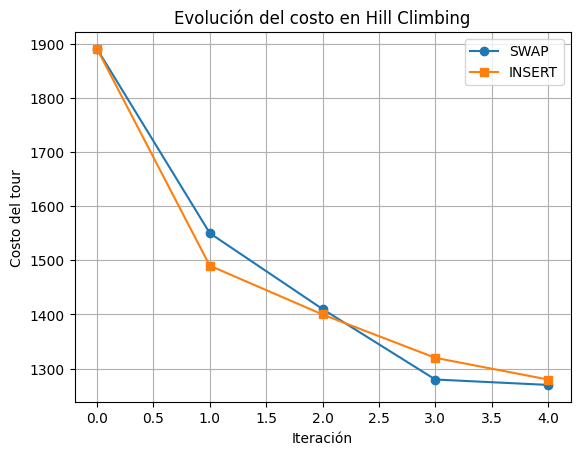

In [ ]:
import matplotlib.pyplot as plt

def hc_trace(initial_tour, neighborhood):
    """Corre HC y guarda el costo en cada iteración."""
    current = initial_tour[:]
    cost = tour_length(current)
    trace = [cost]
    while True:
        nb, new_cost = best_improving_neighbor(current, neighborhood)
        if nb is None or new_cost >= cost:
            break
        current, cost = nb, new_cost
        trace.append(cost)
    return trace

# Misma solución inicial para comparar
init = initial_random_tour(start=0)

trace_swap = hc_trace(init, neighbors_swap)
trace_insert = hc_trace(init, neighbors_insert)

plt.plot(trace_swap, marker="o", label="SWAP")
plt.plot(trace_insert, marker="s", label="INSERT")
plt.xlabel("Iteración")
plt.ylabel("Costo del tour")
plt.title("Evolución del costo en Hill Climbing")
plt.legend()
plt.grid(True)
plt.show()

| Corrida | Vecindario | Tour inicial                     | Costo inicial | Iteraciones | Tour final                       | Costo final |
| ------: | :--------: | :------------------------------- | ------------: | ----------: | :------------------------------- | ----------: |
|       1 |    SWAP    | `[0, 7, 1, 9, 6, 3, 4, 8, 2, 5]` |          1590 |           1 | `[0, 7, 5, 9, 6, 3, 4, 8, 2, 1]` |    **1370** |
|       1 |   INSERT   | `[0, 7, 1, 9, 6, 3, 4, 8, 2, 5]` |          1590 |           2 | `[0, 7, 9, 6, 4, 8, 2, 3, 5, 1]` |    **1350** |
|       2 |    SWAP    | `[0, 3, 8, 6, 5, 2, 1, 9, 7, 4]` |          1920 |           4 | `[0, 7, 6, 9, 8, 2, 1, 5, 3, 4]` |    **1440** |
|       2 |   INSERT   | `[0, 3, 8, 6, 5, 2, 1, 9, 7, 4]` |          1920 |           4 | `[0, 4, 3, 8, 2, 1, 5, 9, 6, 7]` |    **1400** |
|       3 |    SWAP    | `[0, 4, 3, 8, 9, 7, 1, 2, 6, 5]` |          1640 |           3 | `[0, 4, 3, 8, 2, 1, 5, 9, 6, 7]` |    **1400** |
|       3 |   INSERT   | `[0, 4, 3, 8, 9, 7, 1, 2, 6, 5]` |          1640 |           3 | `[0, 4, 3, 2, 8, 9, 6, 7, 5, 1]` |    **1270** |
|       4 |    SWAP    | `[0, 6, 5, 2, 8, 1, 4, 9, 7, 3]` |          2160 |           5 | `[0, 7, 3, 2, 8, 4, 6, 9, 5, 1]` |    **1370** |
|       4 |   INSERT   | `[0, 6, 5, 2, 8, 1, 4, 9, 7, 3]` |          2160 |           4 | `[0, 1, 5, 3, 2, 8, 4, 6, 9, 7]` |    **1350** |
|       5 |    SWAP    | `[0, 9, 1, 6, 2, 5, 8, 3, 7, 4]` |          2040 |           4 | `[0, 1, 9, 6, 7, 5, 3, 2, 8, 4]` |    **1360** |
|       5 |   INSERT   | `[0, 9, 1, 6, 2, 5, 8, 3, 7, 4]` |          2040 |           4 | `[0, 1, 5, 9, 6, 2, 8, 4, 3, 7]` |    **1370** |


# Conclusión
Trabajar con el algoritmo de Hill Climbing para resolver el Problema del Agente Viajero (TSP) fue una experiencia enriquecedora que permitió observar de primera mano tanto las ventajas como las limitaciones de la búsqueda local. Una de las primeras conclusiones es que Hill Climbing resulta intuitivo de entender e implementar: parte de una solución inicial y, paso a paso, busca mejorarla evaluando los vecinos inmediatos. Este enfoque hace que el algoritmo sea muy eficiente en tiempo y memoria, ya que solo necesita considerar el estado actual y sus vecinos directos.

Sin embargo, el trabajo experimental dejó claro que esa simplicidad también trae problemas. El algoritmo suele quedarse atrapado en óptimos locales, es decir, soluciones que no son las mejores posibles pero que no pueden mejorar intercambiando solo dos elementos. En mis pruebas, esto se evidenció porque, aunque el costo inicial se reducía rápidamente en las primeras iteraciones, llegaba un punto en que el algoritmo ya no encontraba vecinos mejores y se detenía, incluso si la solución todavía podía ser optimizada mediante cambios más amplios.

La experimentación con diferentes vecindarios fue particularmente ilustrativa. Con SWAP, que intercambia dos ciudades del tour, el algoritmo alcanzaba mejoras rápidas, pero a veces quedaba en un costo final más alto. En contraste, con INSERT, que permite mover una ciudad de una posición a otra, se observaron soluciones finales de menor costo promedio, aunque con más iteraciones. Esto confirma la importancia del diseño de la función de vecindad: pequeños cambios en la definición del vecindario pueden modificar drásticamente la calidad de la solución encontrada.

Otro aprendizaje importante fue la influencia de la solución inicial. Partir de un tour aleatorio conduce a resultados variables, mientras que comenzar con una heurística como vecino más cercano puede ofrecer un buen punto de partida que facilita alcanzar soluciones de menor costo. Esto conecta con las recomendaciones teóricas de que Hill Climbing puede beneficiarse de reinicios aleatorios o inicializaciones inteligentes para escapar de óptimos locales.

Entre las dificultades encontradas estuvo el hecho de que los resultados no siempre eran consistentes de una corrida a otra, lo que puede confundir al inicio. También fue un reto interpretar si el algoritmo estaba funcionando “bien” o si simplemente había quedado atascado. Para superar esto, la representación en tablas y la gráfica de convergencia de costos por iteración fueron herramientas clave para analizar y comparar objetivamente el rendimiento de cada vecindario.

En conclusión, Hill Climbing es un método valioso para problemas de optimización como el TSP, ya que proporciona soluciones razonables en poco tiempo y con bajo consumo de memoria. No obstante, no garantiza alcanzar el óptimo global, y su efectividad depende en gran medida de la forma en que se defina el vecindario y de cómo se elija la solución inicial. Esta experiencia resalta la necesidad de complementar Hill Climbing con técnicas adicionales, como reinicios múltiples, búsqueda más diversificada o metaheurísticas más sofisticadas (como Recocido Simulado), para lograr resultados más robustos en espacios de búsqueda complejos.